In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%mkdir /content/drive/MyDrive/Colab\ Notebooks
%cd /content/drive/MyDrive/Colab Notebooks
%ls

mkdir: cannot create directory ‘/content/drive/MyDrive/Colab Notebooks’: File exists
/content/drive/MyDrive/Colab Notebooks
fairseq/  kftt-data-1.0/  result/  tokenized_data/


In [3]:
!git clone https://github.com/pytorch/fairseq
%cd fairseq 
!pip install --editable ./
%cd ..


fatal: destination path 'fairseq' already exists and is not an empty directory.
/content/drive/MyDrive/Colab Notebooks/fairseq
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/Colab%20Notebooks/fairseq
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 235 kB 8.2 MB/s 
     |████████████████████████████████| 123 kB 59.1 MB/s 
     |████████████████████████████████| 92 kB 10.5 MB/s 
     |████████████████████████████████| 112 kB 69.9 MB/s 
     |████████████████████████████████| 596 kB 62.2 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=759af3ed5a5aff7545f1379440ae792cf42f72fe35ec111ded4022deaa9bc81e
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb

In [4]:
!echo $PYTHONPATH

import os
os.environ['PYTHONPATH'] += ":/content/drive/MyDrive/Colab Notebooks/fairseq/"

!echo $PYTHONPATH

/env/python
/env/python:/content/drive/MyDrive/Colab Notebooks/fairseq/


# 90

In [5]:
# !fairseq-preprocess \
#     --trainpref ./tokenized_data/train \
#     --validpref ./tokenized_data/dev \
#     --testpref  ./tokenized_data/test \
#     --source-lang ja \
#     --target-lang en \
#     --tokenizer space \
#     --workers 10 \
#     --thresholdsrc 5 \
#     --thresholdtgt 5 \
#     --destdir result/preprocessing 

  # --thresholdsrc 5 \
    # --thresholdtgt 5 \

!fairseq-preprocess \
    --trainpref ./tokenized_data/train \
    --validpref ./tokenized_data/dev \
    --testpref  ./tokenized_data/test \
    --source-lang ja \
    --target-lang en \
    --tokenizer space \
    --workers 20 \
    --thresholdsrc 3\
    --thresholdtgt 3\
    --task translation \
    --destdir result/preprocessing 

2022-07-19 10:22:47 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-07-19 10:24:13 | INFO | fairseq_cli.preprocess | Namespace(aim_repo=None, aim_run_hash=None, align_suffix=None, alignfile=None, all_gather_list_size=16384, amp=False, amp_batch_retries=2, amp_init_scale=128, amp_scale_window=None, azureml_logging=False, bf16=False, bpe=None, cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='result/preprocessing', dict_only=False, empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_no_flatten_grads=False, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_file=None, log_format=None, log_interval=100, lr_scheduler='fixed', memory_efficient_bf16=False, memory_efficient_fp16=False, min_loss_scale=0.0001, model_parallel_size=1, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, on_cpu_convert_precision=False, only_source=False, optimizer=None, padding_factor=8, plasma_path='/tmp/plasma', p

# 91

In [ ]:
# !fairseq-train result/preprocessing/ \
#   --task translation \
#   --arch transformer \
#   --save-dir result/train \
#   --source-lang ja --target-lang en \
#   --optimizer adam \
#   --max-epoch 3 \
#   --lr 1e-5 \
#   --batch-size 64 \
#   --fp16
# !fairseq-train result/preprocessing/ \
#   --task translation \
#   --arch transformer \
#   --save-dir result/train \
#   --source-lang ja \
#   --target-lang en \
#   --optimizer adam \
#   --tokenizer space \
#   --max-epoch 3 \
#   --lr 1e-5 \
#   --batch-size 64 \
#   --patience 2 \
    # --share-decoder-input-output-embed \
    # --clip-norm 1.0 \
    # --lr-scheduler inverse_sqrt \
    # --warmup-updates 2000 \
    # --dropout 0.2 \
    # --label-smoothing 0.1 \
    # --max-tokens 8000 > 91.log

%env CUDA_VISIBLE_DEVICES=0 
!fairseq-train result/preprocessing \
    --fp16 \
    --save-dir result/train \
    --max-epoch 6 \
    --arch transformer \
    --optimizer adam \
    --lr 1e-4 \
    --weight-decay 0.0001 \
    --criterion label_smoothed_cross_entropy \
    --batch-size 256 \
    --save-interval 2 \

ストリーミング出力は最後の 5000 行に切り捨てられました。
|       from large pool |     261    |     263    |    7339 K  |    7339 K  |
|       from small pool |     344    |     496    |    5399 K  |    5399 K  |
|---------------------------------------------------------------------------|
| GPU reserved segments |      69    |      86    |   55208    |   55139    |
|       from large pool |      45    |      45    |    4004    |    3959    |
|       from small pool |      24    |      41    |   51204    |   51180    |
|---------------------------------------------------------------------------|
| Non-releasable allocs |      57    |      58    |    7172 K  |    7172 K  |
|       from large pool |      44    |      45    |    4175 K  |    4175 K  |
|       from small pool |      13    |      30    |    2996 K  |    2996 K  |
|---------------------------------------------------------------------------|
| Oversize allocations  |       0    |       0    |       0    |       0    |
|-------------------------------

In [6]:
!pip3 install tensorboardX

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.4 MB/s 


# 92

In [7]:
# !fairseq-interactive --path result/checkpoint_best.pt result/preprocessing < ./test.ja | grep '^H' | cut -f3 > 92.out
!fairseq-interactive --path result/train/checkpoint_last.pt result/preprocessing < ./tokenized_data/test.ja | grep '^H' | cut -f3 > 92.out

2022-07-19 10:24:26 | INFO | fairseq_cli.interactive | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': False, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging': False, 'suppress_crashes': False, 'use_plasma_view': False, 'plasma_path': '/tmp/plasma'}, 'common_eval': {'_na

In [8]:
!cat ./tokenized_data/test.en

infobox buddhist
dogen was a zen monk in the early kamakura period  
the founder of soto zen
later in his life he also went by the name kigen  
within the sect he is referred to by the honorary title koso  
posthumously named bussho dento kokushi   or joyo daishi  
he is generally called dogen zenji  
he is reputed to have been the one that spread the practices of tooth brushing   face washing   table manners and cleaning in japan  
another story has it that he was the first one to bring moso chiku   moso bamboo   to japan  
though some points are unclear about dogen  s birth   all accounts agree that he was born in the line of udaijin   minister of the right   michichika tsuchimikado   minamoto no michichika or michichika koga    
although it is generally accepted that he was born in shoden sanso in kohata   kyoto   to michichika and fujiwara no ishi   the daughter of daijo daijin   grand minister of state   motofusa matsudono   fujiwara no motofusa     recent research suggests that h

# 93

In [9]:
!fairseq-score \
--sys 92.out \
--ref ./tokenized_data/test.en

Namespace(ignore_case=False, order=4, ref='./tokenized_data/test.en', sacrebleu=False, sentence_bleu=False, sys='92.out')
BLEU4 = 2.21, 22.5/5.0/1.5/0.5 (BP=0.733, ratio=0.763, syslen=17326, reflen=22710)


# 94

In [16]:
%%bash
for N in `seq 1 5`
do
    fairseq-interactive --path result/train/checkpoint_last.pt --beam $N result/preprocessing < ./tokenized_data/test.ja | grep '^H' | cut -f3 > 94_$N.out
done

2022-07-19 10:34:11 | INFO | fairseq_cli.interactive | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': False, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging': False, 'suppress_crashes': False, 'use_plasma_view': False, 'plasma_path': '/tmp/plasma'}, 'common_eval': {'_na

In [21]:
%%bash
for N in `seq 1 5`
do
    fairseq-score --sys 94_$N.out --ref ./tokenized_data/test.en > 94_$N.score
done

In [22]:
!cat 94_2.score

Namespace(ignore_case=False, order=4, ref='./tokenized_data/test.en', sacrebleu=False, sentence_bleu=False, sys='94_2.out')
BLEU4 = 2.17, 22.8/5.0/1.4/0.5 (BP=0.749, ratio=0.775, syslen=17609, reflen=22710)


In [23]:
import matplotlib.pyplot as plt
import re


def read_score(filename):
    with open(filename) as f:
        x = f.readlines()[1]
        x = re.search(r'(?<=BLEU4 = )\d*\.\d*(?=,)', x)
        return float(x.group())

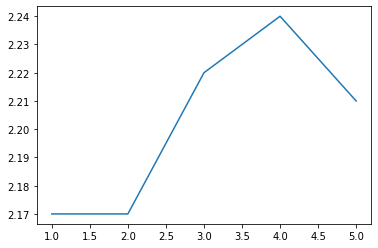

In [24]:
# import matplotlib.pyplot as plt
# import re


# def read_score(filename):
#     with open(filename) as f:
#         x = f.readlines()[1]
#         x = re.search(r'(?<=BLEU4 = )\d*\.\d*(?=,)', x)
#         return float(x.group())


xs = range(1, 6)
ys = [read_score(f'94_{x}.score') for x in xs]
plt.plot(xs, ys)
plt.show()